In [4]:
import pandas as pd 
import geopandas as gpd
import math 
import numpy
import folium

import configparser 
import sqlalchemy

CONFIG = "sample_config.cfg"
ENGINE = "engine"
URL = "url"
PORT = "port"
USERNAME = "db_username"
PASSWORD = "password"
DBNAME = "db_name"
DRIVER = "driver" 
FSTR_POSTGIS_CONNECT = f"{{{ENGINE}}}://{{{USERNAME}}}:{{{PASSWORD}}}@{{{URL}}}:{{{PORT}}}/{{{DBNAME}}}"
config = configparser.ConfigParser()
config.read(CONFIG)

engine = sqlalchemy.create_engine(FSTR_POSTGIS_CONNECT.format(**config["postgis"]), echo=False)

# In 1 hour around the world of spatial data

## Why should I care? 

<img src="https://c.tenor.com/5DwSkvVPhhoAAAAC/sheldon-bbt.gif" alt="Projections" width="600"/>


### Spatial data is everywhere...
Package tracking

<img src="https://www.micromata.de/wp-content/uploads/2021/07/referenz-dhl-track-and-trace_1200x600.png" alt="Projections" width="800"/>

Personal fitness tracker

<img src="https://miro.medium.com/max/640/1*PYyswpO716s8bypKvcZtXA.png" alt="Projections" width="800"/>



Utilities

<img src="https://gdm-catalog-fmapi-prod.imgix.net/ProductScreenshot/bde802b2-cbc7-4785-8118-42b7ba117819.png?auto=format&q=50" alt="Projections" width="800"/>



### Spatial data is fun 
<img src="https://www.esri.com/arcgis-blog/wp-content/uploads/2018/02/05-fig-5-4-v2.png" alt="Projections" width="800"/>


![alt-text](https://imgs.xkcd.com/comics/mercator_projection.png)

![alt-text](https://imgs.xkcd.com/comics/sea_chase.png)

## What are we going to talk about? 

- Spatial data 101 
- Spatial data wrangling 
- Use cases 

What are we **not** going to talk about? 
- GIS systems 
- Spatial data science 
- Advanced stuff (network analysis, routing) 

# Introduction: What is spatial data? 

Data associated with spatial component - objects referencing position on the earth's surface. 

Spatial data consists of a spatial information (**where**), attributes (**what**) and sometimes temporal information (**when**).

Examples: 
- satellite imagery 
- topography
- power lines, cables, substations 
- exercise tracking (e.g. running, biking)

# Types of spatial data

## Raster representation (grid)

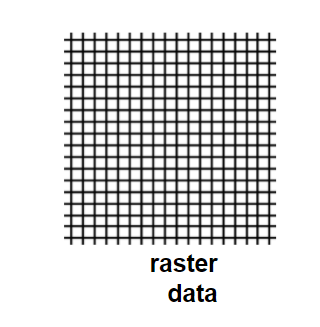

Geographic space is divided into cells. 

Each cell is geographically located and receives attributes or properties. 


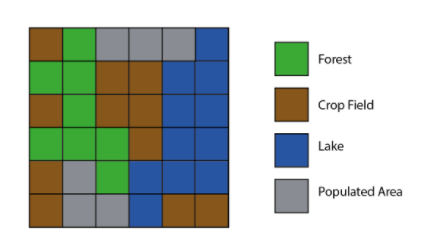

## Vector representation (Points)

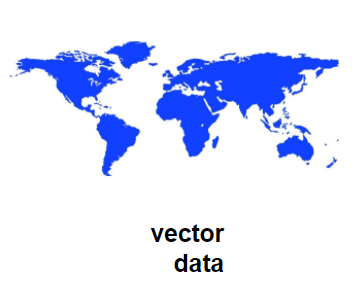

Points with X, Y, (Z) - coordinates which can be connected to more complex geometric types like Polygons or Lines. 

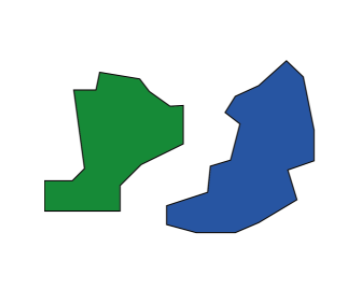


In [5]:
gdf_substations = gpd.read_file("data/substation.geojson")
gdf_substations.sample(5)

,osm_id,category,longitude,latitude,city,geometry
324,node/4300257335,substation,6.951205,51.366672,Essen,POINT (357379.602 5692593.803)
112,node/1289076460,substation,7.015337,51.465611,Essen,POINT (362141.604 5703472.683)
123,node/1308072560,substation,7.038109,51.439620,Essen,POINT (363645.800 5700539.868)
428,node/7934111915,substation,6.986968,51.483181,Essen,POINT (360224.915 5705480.206)
456,way/55355444,substation,7.020660,51.448600,Essen,"POLYGON ((362459.526 5701568.026, 362457.071 5..."


<AxesSubplot:>

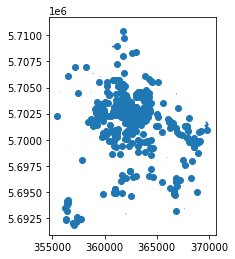

In [6]:
gdf_substations.plot()

# Geometric Data Types

## Singular data types
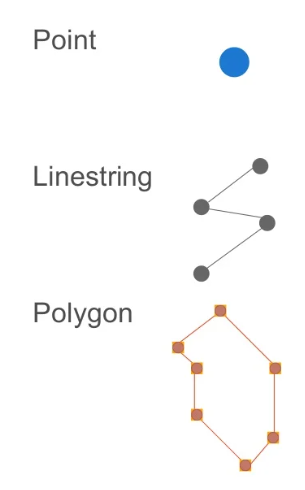


## Combined data types

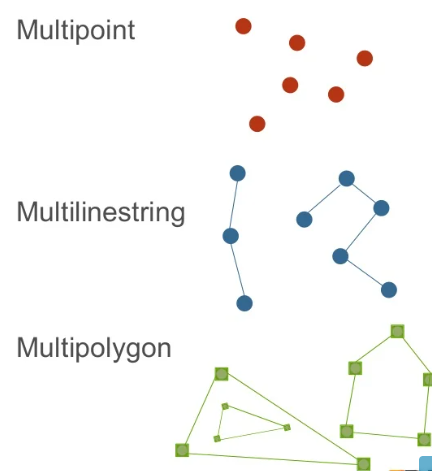

## Examples of data types

[Point](https://www.openstreetmap.org/node/844436661#map=19/51.48840/6.97349)

[Polygons](https://www.openstreetmap.org/way/610528384)

[LineStrings](https://www.openstreetmap.org/relation/1109613#map=15/51.4984/6.9737)

[Multipolygons](https://www.openstreetmap.org/relation/89605) can consist of (combinations of) outer rings and interior rings (holes).



# Projections and coordinate reference systems

## Coordinate and Spatial Reference System

### The earth is a .... ? 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Orlando-Ferguson-flat-earth-map_edit.jpg" alt="Projections" width="800"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg" alt="Projections" width="600"/>

<img src="https://timeandnavigation.si.edu/sites/default/files/multimedia-assets/540-geoid_-_nga.jpg" alt="Projections" width="600"/>

## Projections 
**Problem**: Sphere cannot be projected to a 2D-surface without some kind of distortion

<img src="https://docs.qgis.org/3.10/de/_images/projection_families.png" alt="Projections" width="600"/>



<img src="https://imgs.xkcd.com/comics/map_projections.png" alt="Projections" width="500"/>

Coordinate reference system (CRS) = elipsoid + coordinate system (e.g. units)

Spatial reference system (SRS) = CRS + projection 

CRS are referenced by unique **EPSG-Codes** 
    

Most common coordinate Reference Systems: 
- [World Geodetic System 1984, EPSG:4326](https://epsg.io/4326)
- [Gauß-Krüger, EPSG:31467](https://epsg.io/31467)
- [Universal Transverse Mercator (UTM), EPSG:25832](https://epsg.io/25832)  
- [Lambert Projection, EPSG:3035](https://epsg.io/3035)
    

Competing qualitative properties: 
 - Measurement (equidistant and/or equal area)
 - Shape (angular conformity)
 - Direction (Is north really north?, Is a straight line the shortest distance between two point?)
 - Range of area supported (only locally applicable?)
 


<img src="https://www.visualcapitalist.com/wp-content/uploads/2018/11/mercator-vs-truesize.gif" alt="Projections" width="600"/>

### The true size of
[the-true-size-of](https://www.thetruesize.com/)

Flight routes

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/World-airline-routemap-2009.png" alt="Projections" width="800"/>

Straight (?) line 

<img src="https://i.redd.it/hxc0ykux4wp91.png" alt="straight-line-USA-india" width="800"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/UN_emblem_blue.svg/1200px-UN_emblem_blue.svg.png" alt="Projections" width="600"/>

## Cartesian coordinate systems

**Cartesian Coordinate** Reference Systems: 

Advantages: 
- meaningful values for distances, areas and volumes
- more efficient distance computation

Disadvantages: 
- only work for a supported area 

Universal Transerverse Mercator (UTM)

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9e/LA2-Europe-UTM-zones.png" alt="Projections" width="500"/>

### Example: Coordinate transformation and computation

In [5]:
## coordinates in global latitude, longitude coordinate system
p1 = (51.486309, 6.976882)
p2 = (51.486796, 6.977555)
p3 = (51.487438, 6.976351)

Formula for computing the approximate distance between two points

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8390236068c8e84f9fea2729c76a21ec3574a7db" alt="Projections" width="600"/>



In [6]:
import pyproj

source_crs = 'epsg:4326' # Global lat-lon coordinate system
target_crs = 'epsg:25832' # UTM coordinates zone 32

wsg_to_utm = pyproj.Transformer.from_crs(source_crs, target_crs)

In [7]:
wsg_to_utm.transform(p1[0], p1[1])

(359534.2923632502, 5705847.34833496)

In [8]:
p1 = wsg_to_utm.transform(p1[0], p1[1])
p2 = wsg_to_utm.transform(p2[0], p2[1])
p3 = wsg_to_utm.transform(p3[0], p3[1])

In [9]:
d1 = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
d1

71.5501428703592

In [10]:
d2 = math.sqrt((p2[0]-p3[0])**2 + (p2[1]-p3[1])**2)
d2

109.96372884763775

In [11]:
d1 * d2

7867.92050960592

In [5]:
from folium.plugins import MarkerCluster

p1 = (51.486309, 6.976882)
p2 = (51.486796, 6.977555)
p3 = (51.487438, 6.976351)

df = pd.DataFrame([p1, p2, p3], columns=["x", "y"])

m = folium.Map(location=[51.48631, 6.97688], tiles="OpenStreetMap", zoom_start=17)
p = folium.FeatureGroup(name='Points')
p.add_child(MarkerCluster(locations=df[["x", "y"]].to_numpy()))
m = m.add_child(p)


In [6]:
m

# Data sources

- internal sources (e.g. GIS)

- OpenStreetMap (OSM)
    - [Map](https://www.openstreetmap.org/#map=17/51.48639/6.97890https://www.openstreetmap.org/#map=17/51.48639/6.97890)
    - [Download Data](https://download.geofabrik.de/https://download.geofabrik.de/)
    

- Government data (Opendata initiatives)
    - [Geodaten NRW](https://www.opengeodata.nrw.de/produkte/geobasis/https://www.opengeodata.nrw.de/produkte/geobasis/)
    - [Bundesamt für Karthographie und Geodäsie](https://gdz.bkg.bund.de/index.php/default/open-data.htmlhttps://gdz.bkg.bund.de/index.php/default/open-data.html)
    - [Orthopictures](https://www.geoportal.nrw/?activetab=maphttps://www.geoportal.nrw/?activetab=map)
    - [3D-building models](https://www.bezreg-koeln.nrw.de/brk_internet/geobasis/3d_gebaeudemodelle/index.htmlhttps://www.bezreg-koeln.nrw.de/brk_internet/geobasis/3d_gebaeudemodelle/index.html),    [digital twin solar radiation](https://vc.systems/bremen-berechnet-solarpotenzial-im-gesamten-stadtgebiet/https://vc.systems/bremen-berechnet-solarpotenzial-im-gesamten-stadtgebiet/)

    - [Sentinel Hub](https://www.sentinel-hub.com/explore/industries-and-showcases/)

# Spatial data wrangling

## Tools

<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" alt="Projections" width="400"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7b/Logo_square_postgis.png" alt="Projections" width="200"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/df/ArcGIS_logo.png" alt="Projections" width="200"/>



## Spatial Relationships

<img src="https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png" alt="Projections" width="800"/>

Spatial databases have the ability to compare relationships between geometries: 
- Equality                 `ST_EQUAL(geometry A, geometry B)`
- Intersection `ST_INTERSECTS(geometry A, geometry B)`
- Overlaps `ST_OVERLAPS(geometry A, geometry B)`
- Within/Contains `ST_WITHIN(geometry A, geometry B)` and `ST_CONTAINS(geometry A, geometry B)`
- Distance queries  `ST_DWithin(geometry A, geometry B, max_distance)`

Example questions that could be answered with spatial relationship queries: 
- Which power lines cross highways or rivers? 
- Which charging stations are in the vicinity of Points-of-Interest? 
- Which buildings are inside nature reserves? 
- Append Postal Code/ Country Code/ AGS by spatial intersection

## Spatial Indices

Makes answering questions like 
- is X **inside of** Y 
- does X **intersect** Y 
- is X **near** Y 

go from 🐌 to 🚀!

On a high level spatial indices work by: 
1. representing objects by **2D-bounding boxes** (4 values regardless of geometry)
2. making spatial comparisons between bounding boxes (**cheap!**) 
3. reserving expensive (but accurate) comparisons between **matched bounding boxes**  

<img src="http://postgis.net/workshops/postgis-intro/_images/bbox.png" alt="Spatial-index" width="800"/>

The most commonly used spatial index is R-Tree:

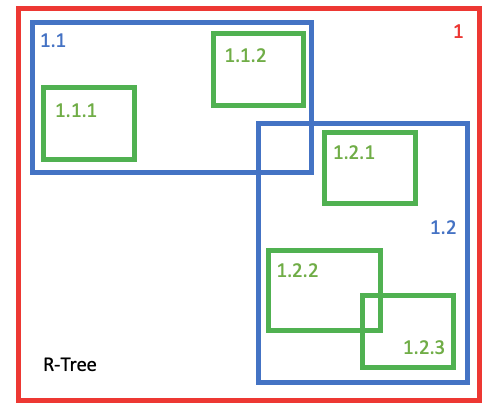

<img src="https://fs.hubspotusercontent00.net/hubfs/2283855/paulblog5.jpeg" alt="Projections" width="600"/>

<img src="https://fs.hubspotusercontent00.net/hubfs/2283855/paulblog7.jpeg" alt="Projections" width="600"/>

Spatial relationship functions like 
- `ST_INTERSECTS`,
- `ST_OVERLAPS`,
- `ST_WITHIN` 
- or `ST_DWithin` 

leverage spatial indices for computation

## Spatial Joins and neighbor searches

Spatial Join is the bread-and-butter of any spatial analysis.

Instead of join-keys the spatial relationships are for combining tables.

<img src="https://www.programiz.com/sites/tutorial2program/files/join-in-sql.png" alt="Projections" width="600"/>

Pseudo Code Join: 
```
SELECT
    id_table_1,
    id_table_2, 
    attribute_table_1, 
    attribute_table_2
FROM table_1
JOIN table_2
ON id_table_1 = id_table_2 
```

<img src="https://datavisdotblog.files.wordpress.com/2022/01/spatial-joins-header.png" alt="Projections" width="800"/>

Pseudo Code Spatial Join: 
```
SELECT
    id_loc,
    id_other_loc, 
    attribute_location, 
    attribute_other_location
FROM locations
JOIN other_locations
ON ST_INTERSECTS(geom_loc, geom_other_loc)
```

### Example 1: Determine the postal code of a house 

### Example 2: Which highways cross rivers? 

### Example 3: Which buildings are inside retail areas? 

# Use cases: 

## Which substations are at risk of flooding? 

In [25]:
#see distance query substation - waterway in spatial_queries.sql 

## Which fire department will put the fire out at my house? 

In [24]:
#see  fire stations and buildings query in spatial_queries.sql 

## Spatial clustering (Tableau and Postgis)

In [23]:
# see example spatial clustering in spatial_queries.sql

# E.ON Use Cases

## [Risk Monitoring for high-voltage lines](https://prodso.de/solutions/rimo/)

## [Finding the most suitable spots for Deutschland Netz charging parks](https://chargingradar.com/)

# Spatial technology stack (Python)
- Data Wrangling: 
    - geopandas (pandas extension for geometric data)
    - pyproj (geographic reference systems)
    - fiona (file I/0)
    - rtree (spatial indexing) 
    - pygeos (spatial indexing)
    - shapely (geometry data)
    - scipy/scikitlean (neighbor-searches) 
    - networkx (network analysis)

 
- Plotting: 
    - matplotlib (+ descartes) 
    - folium (Python leaflet wrapper) 
    - altair (interactive declarative visualizations) 
    - datashader (plotting extremely large datasets) 
 
 
- Misc: 
    - osmnx, osmium (OpenStreetMap data)

# References & Acknowledgements

- https://github.com/martinchristen/bigdatabbq2021
- [PostGis Feature Overview](https://www.youtube.com/watch?v=g4DgAVCmiDE)
- [Introduction to Spatial Indexing](https://blog.crunchydata.com/blog/the-many-spatial-indexes-of-postgis)
- [PostGiS Day 2021](https://www.youtube.com/playlist?list=PLesw5jpZchudjKjwvFks-gAbz9ZZzysFm)
- [PostGiS in Action](https://www.manning.com/books/postgis-in-action-third-edition)
- [Geopandas Tutorial](https://automating-gis-processes.github.io/site/notebooks/L3/spatial_index.html)


# Backup

# Spatial data wrangling

## [Geopandas](https://geopandas.org/en/stable/docs/user_guide/io.html])
 
<img src="imgs//geopandas_logo.png" alt="Projections" width="800"/>


Extension of Pandas for geometric data: 
- geometric datatypes
- spatial indexing/ spatial joins
- geometric functions

In [7]:
gdf_substations = gpd.read_file("./data/substation.geojson")

In [8]:
gdf_substations.head()

,osm_id,category,longitude,latitude,city,geometry
0,node/305990337,substation,6.976786,51.461987,Essen,POINT (359452.903 5703142.979)
1,node/305990706,substation,6.980712,51.460037,Essen,POINT (359719.633 5702918.616)
2,node/305997283,substation,6.975856,51.459681,Essen,POINT (359381.216 5702888.333)
3,node/305997300,substation,6.976803,51.461247,Essen,POINT (359451.825 5703060.693)
4,node/308525558,substation,7.044511,51.433544,Essen,POINT (364072.695 5699852.410)


In [9]:
gdf_substations.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°E to 12°E and ETRS89 by country
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
gdf_substations.to_crs("EPSG:4326")

,osm_id,category,longitude,latitude,city,geometry
0,node/305990337,substation,6.976786,51.461987,Essen,POINT (6.97679 51.46199)
1,node/305990706,substation,6.980712,51.460037,Essen,POINT (6.98071 51.46004)
2,node/305997283,substation,6.975856,51.459681,Essen,POINT (6.97586 51.45968)
3,node/305997300,substation,6.976803,51.461247,Essen,POINT (6.97680 51.46125)
4,node/308525558,substation,7.044511,51.433544,Essen,POINT (7.04451 51.43354)
...,...,...,...,...,...,...
533,way/857128804,substation,6.988020,51.514559,Essen,"POLYGON ((6.98816 51.51487, 6.98840 51.51478, ..."
534,way/891363605,substation,7.065062,51.410293,Essen,"POLYGON ((7.06508 51.41027, 7.06503 51.41028, ..."
535,way/917572339,substation,7.126413,51.446264,Essen,"POLYGON ((7.12753 51.44697, 7.12787 51.44663, ..."
536,way/962292346,substation,7.086280,51.476096,Essen,"POLYGON ((7.08626 51.47606, 7.08625 51.47612, ..."


<AxesSubplot:>

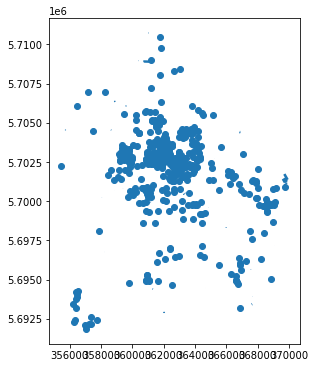

In [11]:
gdf_substations.plot(figsize=(6, 6))

## [PostGis](https://postgis.net/)

<img src="imgs//postgis-logo.png" alt="Projections" width="200"/>


Extension of PostGres for spatial data: 
- geometric datatypes
- spatial indexing 
- array of spatial functions `ST_<something>`

Install with SQL command
```
CREATE EXTENSION postgis;
-- enable raster support (for 3+)
CREATE EXTENSION postgis_raster;
```

## Interaction between PostGis and geopandas

In [12]:
# reading from postgis 
gdf = gpd.read_postgis(con=engine, sql="select * from deep_dive.substation", geom_col="geometry")
gdf.head()

,osm_id,category,longitude,latitude,city,geometry
0,node/305990337,substation,6.976786,51.461987,Essen,POINT (359452.903 5703142.979)
1,node/305990706,substation,6.980712,51.460037,Essen,POINT (359719.633 5702918.616)
2,node/305997283,substation,6.975856,51.459681,Essen,POINT (359381.216 5702888.333)
3,node/305997300,substation,6.976803,51.461247,Essen,POINT (359451.825 5703060.693)
4,node/308525558,substation,7.044511,51.433544,Essen,POINT (364072.695 5699852.410)


In [13]:
# writing to postgis 
gdf.to_postgis(con=engine, name="sample_substations", schema="deep_dive", if_exists="replace")

## Example spatial functions

- `ST_Area(geometry g1)` 
- `ST_Translate(geometry g1, float deltax, float deltay)`
- `ST_Rotate(geometry geomA, float rotRadians)`
- `ST_Length(geometry g1)`
- `ST_Distance(geometry A, geometry B)`

Syntax for creating R-Tree index on geometry column: 

`CREATE INDEX <name_index> ON <table_name> USING GIST (<geometry_column>);`

Dimensionally Extended 9-Intersection Mode 

[DE9IM: Even more complex Model for spatial interaction between two objects](https://postgis.net/workshops/postgis-intro/de9im.html)

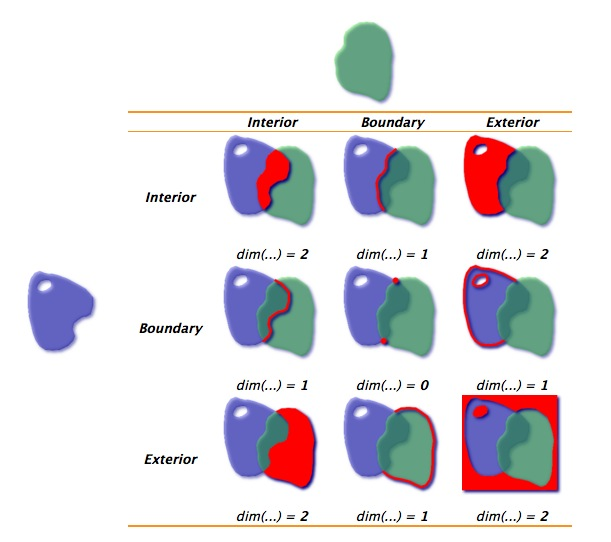

### Neighbor Query between two tables:

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    --ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    WHERE ST_DWithin(geom_loc, geom_other_loc, max_distance)
) subq
```

### Spatial Query between with distance filter:

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    WHERE ST_DWithin(geom_loc, geom_other_loc, max_distance) --spatial index is used
) subq
```

### Spatial Query with limiting the number of neighbors

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    ORDER BY geom_loc <-> geom_other_loc --spatial index is used
    LIMIT 1
) subq
```

### Spatial Query with distance filter and limiting the number of neighbors

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    WHERE ST_DWithin(geom_loc, geom_other_loc, max_distance) --spatial index is used
    ORDER BY geom_loc <-> geom_other_loc --spatial index is used
    LIMIT 1
) subq
```

### Which objects are near other objects? 

#### Naive approach: 

Algorithm: 
1. compute distance from each object to every other object 
2. order by ascending distance 
3. choose the first entry for each object

```
SELECT
    id_loc,
    id_other_loc
FROM locations, other_locations
ORDER BY ST_Distance(geom_loc, geom_other_loc) 
LIMIT 1
```

Bad idea: accurate distance computation has to be done for each object 

#### Simple Distance Query

Better approach: Use broad computation for 

Use `ST_DWithin` Function

``` 
    SELECT 
        id_loc 
    FROM locations 
    WHERE ST_DWithin(geom_loc, 'SRID=25832;POINT(595603.854 5703496.257)'::geometry, 100)
``` 

Example Query nearest neighbor: 

`geom_a <-> geom_b` — Returns the 2D distance between geometry A and geometry B.


``` 
    SELECT 
        id_loc
    FROM locations 
    ORDER BY geom_loc <-> 'SRID=25832;POINT(595603.854 5703496.257)'::geometry
    LIMIT 1
``` 

Most common use case: Distance query between two tables containing geometries

use PostGres equivalent of for each loop: `CROSS JOIN LATERAL`

```
  SELECT  
      id_loc 
      id_other_loc
  FROM locations
  CROSS JOIN LATERAL ( 
          SELECT 
              id_other_loc
           FROM other_locations 
           WHERE ST_DWITHIN(geom_loc, geom_other_loc, 100)
    ) subq
```


In [12]:
SQL = """select 
            h.osm_id as id_highway, 
            h.geometry 
         from deep_dive.highway h
         inner join deep_dive.waterway w
         ON ST_INTERSECTS(h.geometry, w.geometry)
         and h.highway in ('motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'residential')
    """
gdf = gpd.read_postgis(con=engine, sql=SQL, geom_col="geometry")

In [13]:
gdf.head()

,id_highway,geometry
0,way/24595082,"LINESTRING (360766.936 5694754.658, 360780.146..."
1,way/323541564,"LINESTRING (360792.254 5694776.667, 360780.019..."
2,way/23039501,"LINESTRING (356234.508 5691929.533, 356247.504..."
3,way/28476033,"LINESTRING (355917.034 5691493.985, 355921.733..."
4,way/28081652,"LINESTRING (358015.632 5702685.405, 358028.830..."


In [14]:
gdf.shape

(157, 2)

In [20]:
SQL = """select 
            b.osm_id as id_building, 
            b.geometry 
         from deep_dive.building b
         inner join deep_dive.landuse l
         ON ST_WITHIN(b.geometry, l.geometry) and l.landuse = 'retail' 
    """
gdf = gpd.read_postgis(con=engine, sql=SQL, geom_col="geometry")

In [21]:
gdf.head()

,id_building,geometry
0,way/82459610,"POLYGON ((362634.600 5698309.564, 362643.250 5..."
1,way/82459611,"POLYGON ((362625.437 5698320.916, 362622.370 5..."
2,way/82459614,"POLYGON ((362682.587 5698396.536, 362684.479 5..."
3,way/82459617,"POLYGON ((362654.779 5698300.307, 362646.772 5..."
4,way/82459618,"POLYGON ((362681.181 5698346.176, 362689.797 5..."


In [22]:
gdf.shape

(927, 2)